In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [36]:
df.shape

(32561, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [40]:
miss_val_per = df.isnull().mean()*100
miss_val_per

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

In [41]:
df.replace('?', np.nan, inplace=True)

### Imputing the missing values by deleting

In [42]:
#delete the rows where the values are missing
df.dropna(inplace = True)

In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [44]:
#finding the unique value in columns where value are Missing
for col in df.columns:
    if df[col].isnull().sum():
        print(col)
        print(df[col].unique())
        print('\n')

In [45]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [46]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_6056\174945315.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)


education
HS-grad              12540
Some-college          6678
Bachelors             5044
Masters               1627
Assoc-voc             1307
Assoc-acdm            1008
elementary_school      996
Prof-school            542
Doctorate              375
Preschool               45
Name: count, dtype: int64

In [47]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital.status'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_6056\1955406803.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)


marital.status
Married          14456
Never-married     9726
Separated         5153
Widowed            827
Name: count, dtype: int64

In [48]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_6056\2791709200.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)


workclass
Private           22286
Govt_employees     4289
Self_employed      3573
Without-pay          14
Name: count, dtype: int64

income
<=50K    22654
>50K      7508
Name: count, dtype: int64


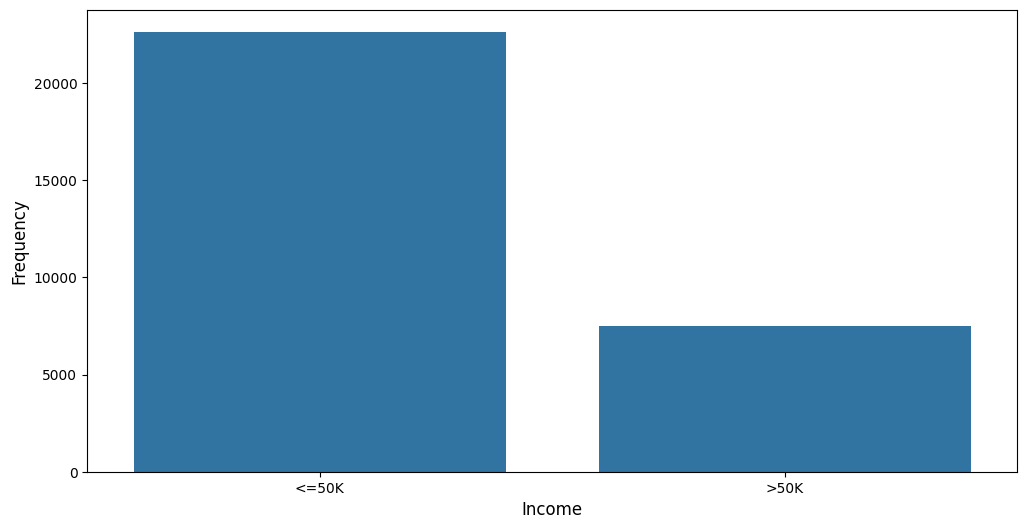

In [49]:
ib = df['income'].value_counts()
print(ib)

plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [50]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

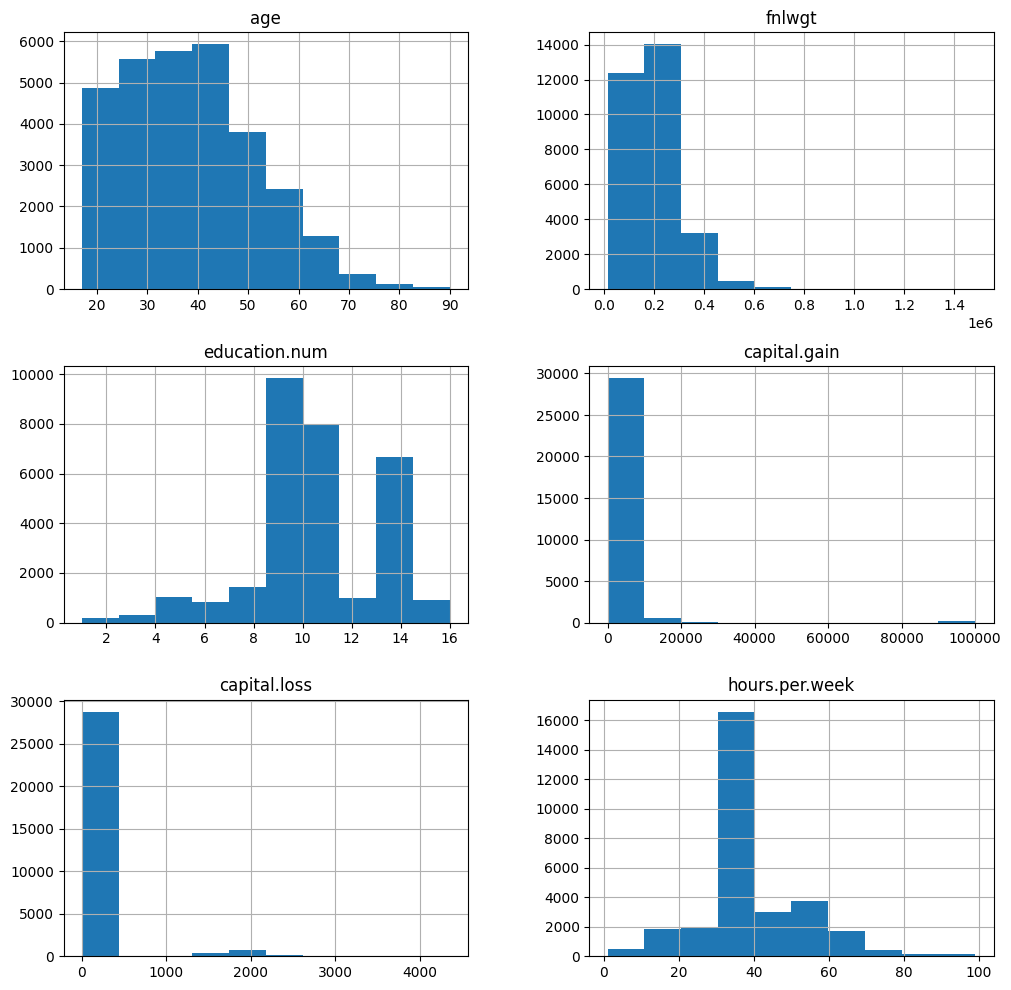

In [51]:
df[list(num_col.index)].hist(figsize = (12,12));

- `age`: In our dataset People from age group of 18 to 50 can be observed.
- `hours per week`: Generally people can be seen working for 30 hours to 40 hours per week.
- `education`: people above 8th grade are more in our dataset.
- Our dataset is highly skewed and we should consider scaling it for better performance of our models.

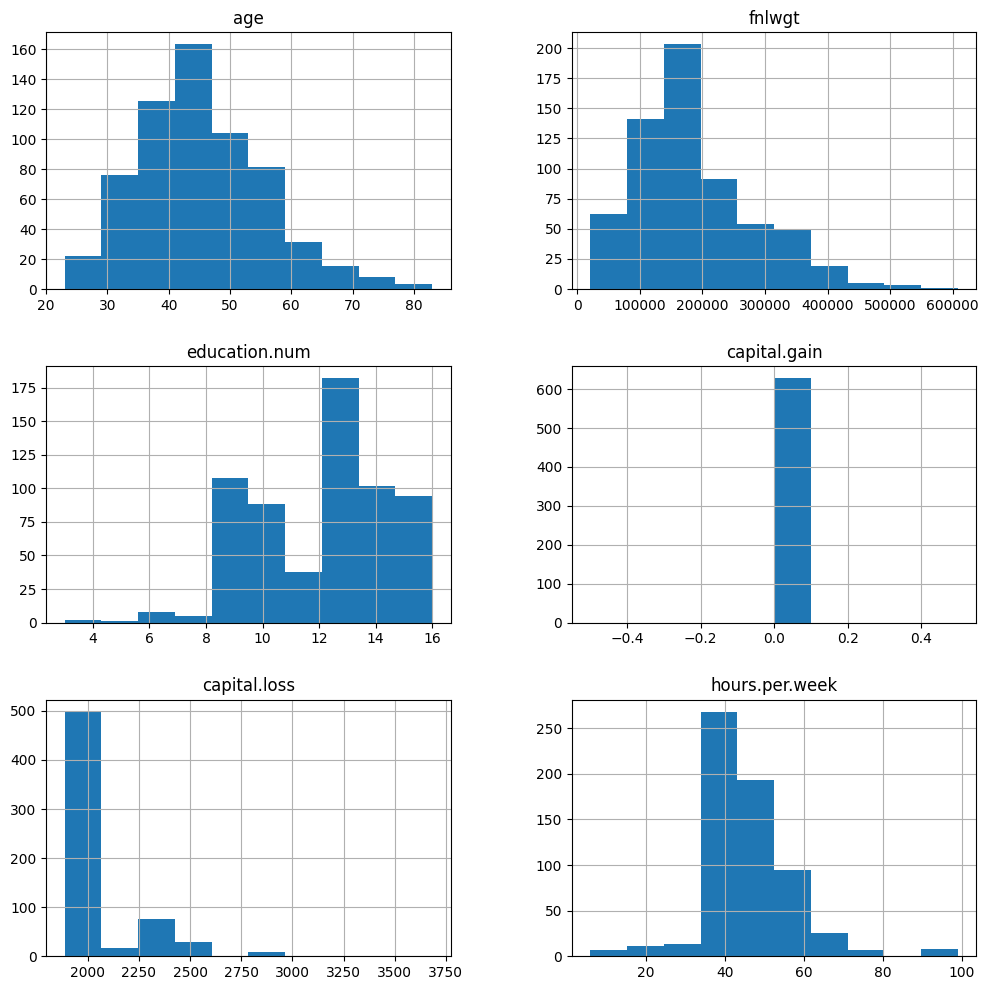

In [52]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
df[(df['capital.loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize = (12,12));

- Education and hours per week are significantaly high.
- There are some other factors affecting their loss other than the above.

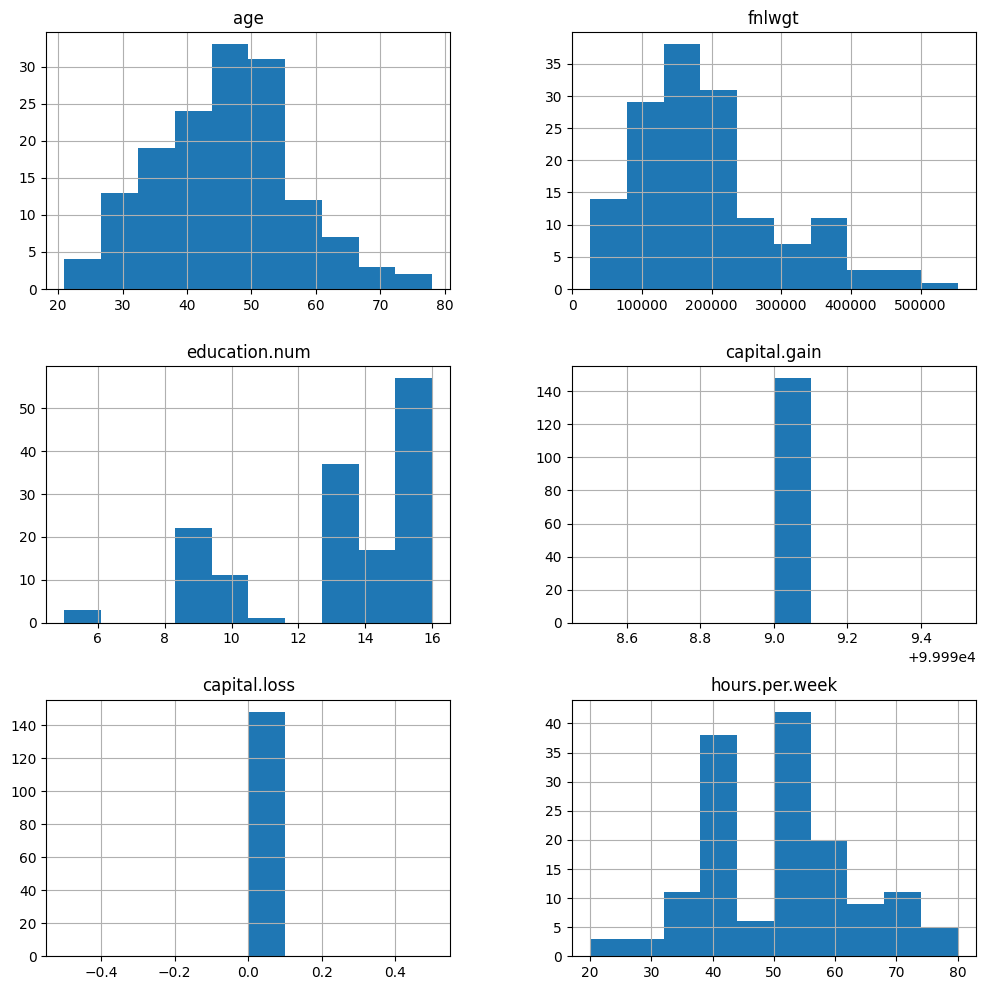

In [53]:
df.loc[df['capital.gain'] == 99999,:].hist(figsize = (12,12));

- Age group and hours per week are fairly distributed for capital gain of 99999.

In [54]:
# Separate features (X) and target variable (y)
selected_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Separate features (X) and target variable (y)
X = df[selected_columns]
y = df['income']

# Chi-square test for categorical variables
chi2_results = []
for column in X.select_dtypes(include='object'):
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': column, 'Chi2': chi2, 'P-value': p})

print("Chi-square Test Results:")
print(pd.DataFrame(chi2_results))

Chi-square Test Results:
          Feature         Chi2        P-value
0       workclass   460.915366   1.406662e-99
1       education  3953.864983   0.000000e+00
2  marital.status  5790.362233   0.000000e+00
3      occupation  3687.620651   0.000000e+00
4    relationship  6233.840454   0.000000e+00
5            race   304.241374   1.317829e-64
6             sex  1415.286404  1.001553e-309
7  native.country   317.736675   6.221222e-45


In [55]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

cols = ['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country','income']
for col in cols:
    df[col] = label_encoder(df[col])

df.head()

education ['Assoc-acdm' 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters'
 'Preschool' 'Prof-school' 'Some-college' 'elementary_school']
workclass ['Govt_employees' 'Private' 'Self_employed' 'Without-pay']
marital.status ['Married' 'Never-married' 'Separated' 'Widowed']
occupation ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
relationship ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
sex ['Female' 'Male']
native.country ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicara

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,1,132870,4,9,3,3,1,4,0,0,4356,18,38,0
3,54,1,140359,9,4,2,6,4,4,0,0,3900,40,38,0
4,41,1,264663,8,10,2,9,3,4,0,0,3900,40,38,0
5,34,1,216864,4,9,2,7,4,4,0,0,3770,45,38,0
6,38,1,150601,4,6,2,0,4,4,1,0,3770,40,38,0


In [56]:
# # df['income']

# # Select only numeric columns
# df_numeric = df.select_dtypes(include=[np.number])

# # Create the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

Logistic Regression

In [57]:
X = df.drop(['income', 'fnlwgt', 'native.country','workclass','occupation', 'race','relationship','sex'], axis=1)
#X = df.drop(['income'], axis=1)
y = df['income']

In [58]:
# split the data into train and validate sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [59]:
max_depth = list(range(1, 30))
acc_gini = []
acc_entropy = []

for depth in max_depth:
    dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    dtree_gini.fit(X_train, y_train)
    pred_gini = dtree_gini.predict(X_val)
    acc_gini.append(accuracy_score(y_val, pred_gini))
    
    dtree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)
    dtree_entropy.fit(X_train, y_train)
    pred_entropy = dtree_entropy.predict(X_val)
    acc_entropy.append(accuracy_score(y_val, pred_entropy))

In [60]:
#print the best depth
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
'acc_entropy':pd.Series(acc_entropy),
'max_depth':pd.Series(max_depth)})

In [62]:
#print the best depth
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
'acc_entropy':pd.Series(acc_entropy),
'max_depth':pd.Series(max_depth)})
print(d)

    acc_gini  acc_entropy  max_depth
0   0.749353     0.749353          1
1   0.823487     0.823487          2
2   0.839931     0.839931          3
3   0.840859     0.840196          4
4   0.843246     0.842451          5
5   0.850938     0.847888          6
6   0.852795     0.851668          7
7   0.855845     0.854187          8
8   0.857967     0.855845          9
9   0.863338     0.857967         10
10  0.867383     0.863404         11
11  0.870698     0.868643         12
12  0.875207     0.870234         13
13  0.880180     0.875406         14
14  0.882700     0.879186         15
15  0.888602     0.883827         16
16  0.893044     0.886281         17
17  0.897885     0.891718         18
18  0.900802     0.895697         19
19  0.904847     0.899211         20
20  0.908096     0.902725         21
21  0.911213     0.904582         22
22  0.913467     0.907964         23
23  0.914860     0.910948         24
24  0.916517     0.912937         25
25  0.917181     0.913534         26
2

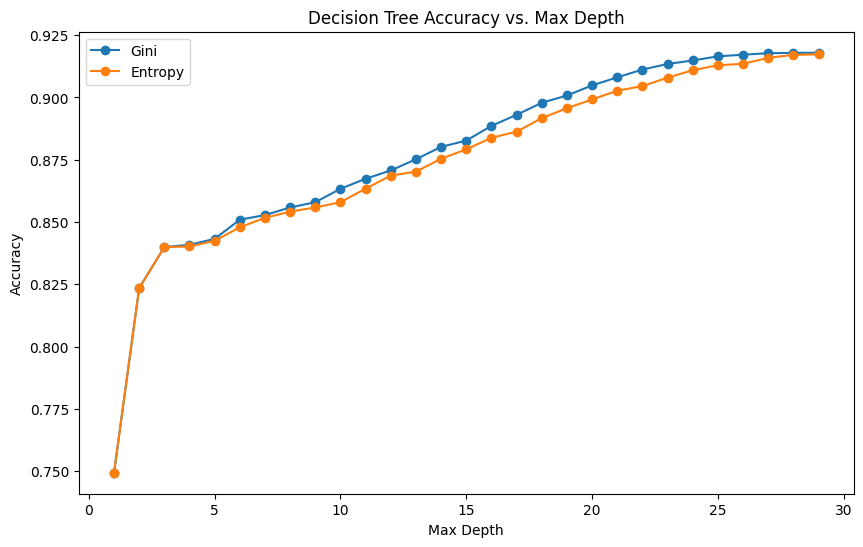

In [63]:
# Plot accuracy vs. max_depth for gini and entropy
plt.figure(figsize=(10, 6))
plt.plot(max_depth, acc_gini, label='Gini', marker='o')
plt.plot(max_depth, acc_entropy, label='Entropy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.show()

In [64]:
#fit the model using the best depth
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=9)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [65]:
# get predictions and probability of default on the validate set
pred = dtree.predict(X_val)
print('The accuracy of the Decision Tree is',"{:.3f}".format(accuracy_score(y_val, pred)))


The accuracy of the Decision Tree is 0.856


[[10804   497]
 [ 1677  2103]]


<Axes: >

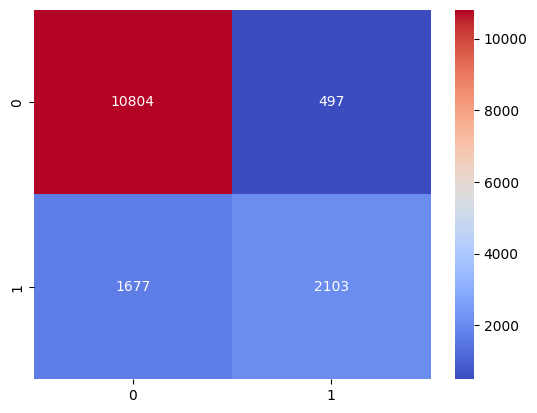

In [66]:
# Generate and plot the confusion matrix and get the classification metrics
conf_matrix = confusion_matrix(y_val, pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')


In [67]:
#print the classification report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11301
           1       0.81      0.56      0.66      3780

    accuracy                           0.86     15081
   macro avg       0.84      0.76      0.78     15081
weighted avg       0.85      0.86      0.85     15081

